In [1]:
from urllib.request import urlretrieve
import pandas as pd
import numpy as np

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"
out_file = 'creditcard.csv'

import os
if not os.path.exists(out_file):
    urlretrieve(url, out_file)
else:
    pass

df = pd.read_csv(out_file)
print(len(df))
df.head()

284807


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# to simulate the real world dataset which is much larger, we increase our df size by multiplying it by 10
df = pd.DataFrame(np.repeat(df.values, 10, axis=0), columns=df.columns)
# df.values: represents each row
print(len(df))
df.head()

# target variable is Class

2848070


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


[0. 1.]
Class
0.0    2843150
1.0       4920
Name: count, dtype: int64


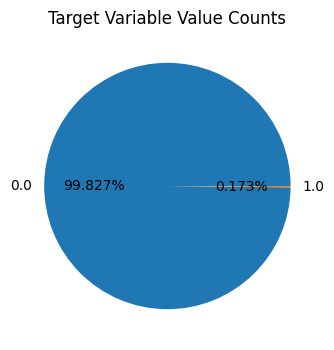

In [3]:
import matplotlib.pyplot as plt

# get all the labels for the class column
labels = df['Class'].unique()  # returns a numpy
print(labels)

# number of each label
size = df['Class'].value_counts()  # retunrs pandas series
print(size)

# draw the pie plot
plt.figure(figsize=(4, 4))
plt.pie(size.values, labels=labels, autopct='%1.3f%%')
# 1.: minimum field width of 1 character before the decimal
# .3: number of decimals

plt.title('Target Variable Value Counts')
plt.show()


In [4]:
print(f'Min amount: {np.min(df['Amount'].values)}')
print(f'Max amount: {np.max(df['Amount'].values)}')
print(f'90% of the transactions have an amount less or equal than: {np.percentile(df['Amount'].values, 90)}')

Min amount: 0.0
Max amount: 25691.16
90% of the transactions have an amount less or equal than: 203.0


Dataset Preprocessing 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.utils.class_weight import compute_sample_weight

X = df.iloc[:, 1:30].values  # remove the time and class columns # this is 2D
y = df['Class'].values
 
# no standardization or normalization is needed for decission tree, even with positive values for deposits and negative values for withdrawals (Claude), unlike what the main file says.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train_weight = compute_sample_weight('balanced', y_train)
# for credit card fraud detection, sample weights become more important because:
# 1-Class Imbalance: Fraud cases are typically very rare (maybe <1% of transactions), so your dataset is likely highly imbalanced
# 2-Cost Sensitivity: False negatives (missing fraud) are typically more costly than false positives

model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=15).fit(X_train, y_train, sample_weight=y_train_weight)
#* The accuracy became a littttle bith lower when I added weight to my model, but it now gives me better fraud detection (more important!)

y_pred_prob = model_tree.predict_proba(X_test)[:,1]  # [:,1]: to get just the second column (prob column)
# note that for roc_auc_score we use y_pred_prob instead of y_pred
print(metrics.roc_auc_score(y_test, y_pred_prob))  
# here roc_auc_score is better tahn accuracy_score because the dataset is highly imbalanced where fraudulent transactions (positive class) are much rarer than legitimate ones.
# ROC AUC of 0.5: Your model is no better than random guessing
# ROC AUC of 0.8: Good discrimination
# ROC AUC of 0.9+: Excellent discrimination between fraudulent and legitimate transactions

0.9999511297575285


<details>
<summary>Differences between scikit-learn and Snap ML for building decision tree classifier models</summary>


Performance & Speed:

- Snap ML is generally faster, especially for large datasets, as it's optimized for modern hardware and supports GPU acceleration
- scikit-learn runs on CPU only and can be slower with large datasets

Ease of Use:

- scikit-learn has a simpler, more intuitive API and better documentation
- Snap ML tries to maintain similar API to scikit-learn but has fewer features and less documentation

Model Support:

- scikit-learn supports a wide range of models and preprocessing tools
- Snap ML focuses on a smaller set of commonly used models (Decision Trees, Random Forest, Linear/Logistic Regression)

Compatibility:
- scikit-learn works everywhere Python runs
- Snap ML is optimized for specific hardware setups and may have compatibility limitations
</details>

In [6]:
# Learn building decision tree model with Snap ML later if needed
# Learn building Support Vector Machine model later if needed